## K-Nearest Neighbor Algorithm (KNN) Practicum ##

#### Abstract ####

The objective of the assignment is to design a KNN algorithm from scratch to classify the age 
of the abalone using the abalone dataset provided by the UCI Machine Learning repository

In our results/findings, we have obtained an accuracy prediction of 20 to 26% for both the Train-Test-Split method and the Cross-validation method. 
We have also computed the mean of the Rings label as 9.9337 and the median of the Rings label as 9.0. In terms of accuracy improvement, we could employ feature selection and choose Shell Weight as the 'winner' representation for the Weight feature. Principle Component Analysis Technique (PCA) could be deployed to further improve the model accuracy.

#### Introduction ####

KNN is an instance-based learning algorithm because they simply store the training data in
memory and when a new query data is provided, a set of similar instances are retrieved from the
training data and used to classify the new query instance

In the abalone dataset, there are totally 4,177 data observations with 8 input attributes and 
1 output variable. The input attributes are as follows:

1. Sex (Male (M), Female (F), or Infant (I))
2. Length
3. Diameter
4. Height
5. Whole weight
6. Shucked weight
7. Viscera weight
8. Shell weight
9. Rings (output)

---
### RUNS of TRAIN-TEST SPLIT CODEBASE ###

In [7]:
## for-loop block code to call the knnMain to perform train_test split 
TT_accuracy_list = []
TT_time_list = []
for neighbor in [1,5,10,15,20]:  # looping over number of k-neighbors
    temp_accuracy = []
    temp_time = []
    for train_portion in [0.7,0.6,0.5]: # Looping over train_test_split_ratio
        t1_start = perf_counter() # Start the stopwatch / counter 
        acc = knnMain('abalone.data', train_portion, neighbor)
        print(f"Neighbor: {neighbor}\tTrain_portion: {train_portion}\tAccuracy: {acc}")
        t1_stop = perf_counter() # Stop the stopwatch / counter 
        print(f'Elapsed time taken {t1_stop-t1_start} seconds\n') 
        temp_accuracy.append(acc)
        temp_time.append(t1_stop-t1_start)
    TT_accuracy_list.append(temp_accuracy)
    TT_time_list.append(temp_time)
print('Run completed.')

Neighbor: 1	Train_portion: 0.7	Accuracy: 0.22248803827751196
Elapsed time taken 3.0904947999999983 seconds

Neighbor: 1	Train_portion: 0.6	Accuracy: 0.20766008378216635
Elapsed time taken 3.6365586999999984 seconds

Neighbor: 1	Train_portion: 0.5	Accuracy: 0.20919100047869793
Elapsed time taken 4.601766599999998 seconds

Neighbor: 5	Train_portion: 0.7	Accuracy: 0.22488038277511962
Elapsed time taken 3.0053298000000055 seconds

Neighbor: 5	Train_portion: 0.6	Accuracy: 0.23219628964691802
Elapsed time taken 3.5614293000000004 seconds

Neighbor: 5	Train_portion: 0.5	Accuracy: 0.23839157491622787
Elapsed time taken 4.316326400000001 seconds

Neighbor: 10	Train_portion: 0.7	Accuracy: 0.23604465709728867
Elapsed time taken 2.7820608999999976 seconds

Neighbor: 10	Train_portion: 0.6	Accuracy: 0.26810293237582283
Elapsed time taken 3.5574095999999997 seconds

Neighbor: 10	Train_portion: 0.5	Accuracy: 0.23839157491622787
Elapsed time taken 4.284831099999998 seconds

Neighbor: 15	Train_portion: 

In [8]:
def knnCV_Main(filename, cv_num, k_neighbors): # k = number of neighbors
    accuracy = []
    X = loadData(filename) # data load
    X_norm = dataNorm(X)   # normalization
    X_cv = splitCV(X_norm, cv_num) # split the data set into K folds = number of parts
    accuracy_sum = 0
    print('\nCV_computation ongoing ... ')
    for idx, list_array in enumerate(X_cv): # looping the dataset for cross validation 
        duplicate = X_cv.copy()
        test = list_array
        del duplicate[idx]  # delete the test element from duplicate set, remaining become train elements
        train = duplicate
        train = np.vstack((train))
        accuracy = KNN(train, test, k_neighbors)  # X_split[0] is Xy_train, X_split[1] is Xy_test
        accuracy_sum += accuracy
    return accuracy_sum/cv_num  # return the average accuracy of the k number of neighbors

---
### RUNS of CROSS VALIDATION CODEBASE ###

In [9]:
## for-loop block code to call the knnCV_Main to perform cross validation 
CV_accuracy_list = []
CV_time_list = []
for neighbor in [1,5, 10, 15, 20]:  # looping over number of k-neighbors
    temp_CV_accuracy = []
    temp_CV_time = []
    for cv in [5,10, 15]:  # Looping over the cv numbers
        t1_start = perf_counter() # Start the stopwatch / counter 
        acc_CV = knnCV_Main('abalone.data', cv, neighbor)
        print(f"Neighbor: {neighbor}\tCV: {cv}\tAccuracy: {acc_CV}")
        t1_stop = perf_counter() # Stop the stopwatch / counter 
        print(f'Elapsed time taken {t1_stop-t1_start} seconds\n') 
        temp_CV_accuracy.append(acc_CV)
        temp_CV_time.append(t1_stop-t1_start)
    CV_accuracy_list.append(temp_CV_accuracy)
    CV_time_list.append(temp_CV_time)
print('Run completed.')


CV_computation ongoing ... 
Neighbor: 1	CV: 5	Accuracy: 0.20062355575587176
Elapsed time taken 9.130393500000011 seconds


CV_computation ongoing ... 
Neighbor: 1	CV: 10	Accuracy: 0.19751708067508258
Elapsed time taken 9.422318899999993 seconds


CV_computation ongoing ... 
Neighbor: 1	CV: 15	Accuracy: 0.19800917161008033
Elapsed time taken 10.3513466 seconds


CV_computation ongoing ... 
Neighbor: 5	CV: 5	Accuracy: 0.22887500983695688
Elapsed time taken 9.376694100000009 seconds


CV_computation ongoing ... 
Neighbor: 5	CV: 10	Accuracy: 0.22555088005067647
Elapsed time taken 9.842429800000005 seconds


CV_computation ongoing ... 
Neighbor: 5	CV: 15	Accuracy: 0.2317632210021456
Elapsed time taken 11.737974899999983 seconds


CV_computation ongoing ... 
Neighbor: 10	CV: 5	Accuracy: 0.23773213429771284
Elapsed time taken 9.210268100000008 seconds


CV_computation ongoing ... 
Neighbor: 10	CV: 10	Accuracy: 0.24372483145559026
Elapsed time taken 10.118665300000004 seconds


CV_computation

---
### PART D: Tabulation of accuracy values of K neighbors, with Train-Test-Split and CV methods ###

In [21]:
#PART D: creating dataframe to showcase the ACCURACIES for all TT_split ratios and all CV k-folds against a range of K-neighbors 
df_k = pd.DataFrame(np.array([1, 5, 10, 15, 20]), columns = ['K'])
tt_accuracy_stack = pd.DataFrame(np.vstack([TT_accuracy_list[0], TT_accuracy_list[1], TT_accuracy_list[2], TT_accuracy_list[3], 
                                            TT_accuracy_list[4]]), columns = ['TT 0.7-0.3', 'TT 0.6-0.4', 'TT 0.5-0.5'])
cv_accuracy_stack = pd.DataFrame(np.vstack([CV_accuracy_list[0], CV_accuracy_list[1], CV_accuracy_list[2], CV_accuracy_list[3], 
                                            CV_accuracy_list[4]]), columns = ['CV 5-fold', 'CV 10-fold', 'CV 15-fold'])
df_accuracy = pd.concat([df_k, tt_accuracy_stack, cv_accuracy_stack], axis=1)
df_accuracy

,K,TT 0.7-0.3,TT 0.6-0.4,TT 0.5-0.5,CV 5-fold,CV 10-fold,CV 15-fold
0,1,0.222488,0.207660,0.209191,0.200624,0.197517,0.198009
1,5,0.224880,0.232196,0.238392,0.228875,0.225551,0.231763
2,10,0.236045,0.268103,0.238392,0.237732,0.243725,0.244853
3,15,0.251196,0.254937,0.256582,0.245867,0.251143,0.240157
4,20,0.252791,0.259126,0.252753,0.244917,0.260480,0.255223


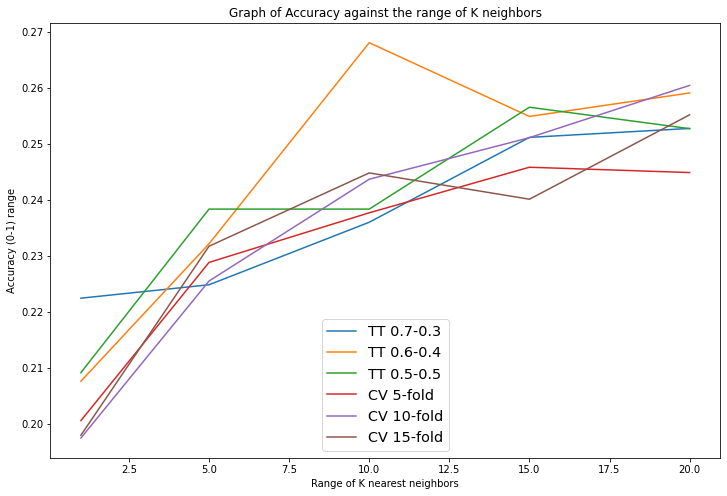

In [22]:
# LINE CHART of the number of rings vs frequency count
plt.figure(figsize=(12,8))
plt.plot(df_accuracy['K'], df_accuracy['TT 0.7-0.3'], label = 'TT 0.7-0.3')
plt.plot(df_accuracy['K'], df_accuracy['TT 0.6-0.4'], label = 'TT 0.6-0.4')
plt.plot(df_accuracy['K'], df_accuracy['TT 0.5-0.5'], label = 'TT 0.5-0.5')
plt.plot(df_accuracy['K'], df_accuracy['CV 5-fold'], label = 'CV 5-fold')
plt.plot(df_accuracy['K'], df_accuracy['CV 10-fold'], label = 'CV 10-fold')
plt.plot(df_accuracy['K'], df_accuracy['CV 15-fold'], label = 'CV 15-fold')
plt.xlabel('Range of K nearest neighbors')
plt.ylabel('Accuracy (0-1) range')
plt.title('Graph of Accuracy against the range of K neighbors')
plt.legend(loc='lower center', fontsize = 'x-large')
plt.show()

#### Comment on Graph of Accuracy against the range of K neighbors ####

From this graph, we can observe and understand that the number of nearest neighbors has a positive relationship 
with the prediction outcome accuracy. 

From K=1 to K=5, we can observe that the rate of increase in the accuracy jumps from an average of 0.20 at k=1
to an average of 0.23. Thereafter, we observe that the slopes of all the lines generally become more gradually and
constant in almost a linear fashion, all the way to k=20. 

From this graph, we can safely conclude that it is preferably not to choose a K value < 5. A K neighbor value greater
or equal to 5 is preferred in this context and possibly applies to other case studies too. 

In addition, we can make an observation from the graph that there is no visible difference between the accuracies of 
the cross-validation runs and the train-test-split runs. However, we do note that from K=15 onwards, the slopes of the 
train-test-split lines are steeper than those of the cross-validation runs. Thus, from K=15 onwards, it might be better
to do train-test-split to yield higher accuracies. 

---
### PART F: Tabulation of computational time values of K neighbors, with Train-Test-Split and CV methods ###

In [20]:
#PART F: creating dataframe to showcase the compute TIMES for all TT_split ratios and all CV k-folds against a range of K-neighbors 
df_k = pd.DataFrame(np.array([1, 5, 10, 15, 20]), columns = ['K'])
tt_time_stack = pd.DataFrame(np.vstack([TT_time_list[0], TT_time_list[1], TT_time_list[2], TT_time_list[3], TT_time_list[4]]), 
                             columns = ['TT 0.7-0.3', 'TT 0.6-0.4', 'TT 0.5-0.5'])
cv_time_stack = pd.DataFrame(np.vstack([CV_time_list[0], CV_time_list[1], CV_time_list[2], CV_time_list[3], CV_time_list[4]]), 
                             columns = ['CV 5-fold', 'CV 10-fold', 'CV 15-fold'])
df_time = pd.concat([df_k, tt_time_stack, cv_time_stack], axis=1)
df_time

,K,TT 0.7-0.3,TT 0.6-0.4,TT 0.5-0.5,CV 5-fold,CV 10-fold,CV 15-fold
0,1,3.090495,3.636559,4.601767,9.130394,9.422319,10.351347
1,5,3.005330,3.561429,4.316326,9.376694,9.842430,11.737975
2,10,2.782061,3.557410,4.284831,9.210268,10.118665,10.116903
3,15,2.578088,3.630316,4.043771,9.165548,9.180764,9.499539
4,20,2.869249,3.418586,4.177686,9.247524,9.190413,9.417225


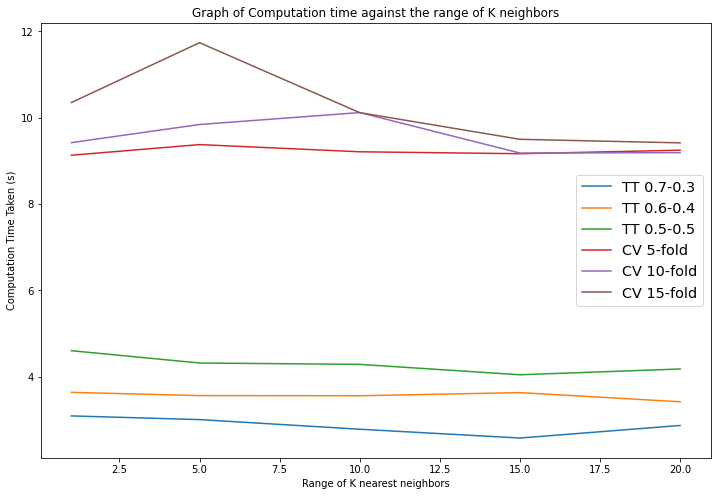

In [23]:
# LINE CHART of the number of rings vs frequency count
plt.figure(figsize=(12,8))
plt.plot(df_time['K'], df_time['TT 0.7-0.3'], label = 'TT 0.7-0.3')
plt.plot(df_time['K'], df_time['TT 0.6-0.4'], label = 'TT 0.6-0.4')
plt.plot(df_time['K'], df_time['TT 0.5-0.5'], label = 'TT 0.5-0.5')
plt.plot(df_time['K'], df_time['CV 5-fold'], label = 'CV 5-fold')
plt.plot(df_time['K'], df_time['CV 10-fold'], label = 'CV 10-fold')
plt.plot(df_time['K'], df_time['CV 15-fold'], label = 'CV 15-fold')
plt.xlabel('Range of K nearest neighbors')
plt.ylabel('Computation Time Taken (s)')
plt.title('Graph of Computation time against the range of K neighbors')
plt.legend(fontsize = 'x-large')
plt.show()

#### Comment on Graph of Computational Time against the range of K neighbors ####

From this graph, we can observe and understand that the number of nearest neighbors has a positive relationship 
with computation time taken for cross-validation lines. On comparision, with the computation time taken for train-test-split lines, 
the cross-validation method takes longer time than the train-test-split, due to more computation steps that the cross-validation 
method needs to perform, which slows it down. 

Having said that, it is inappropriate to assume that cross-validation is not recommended over train-test-split, despite that 
train-test-split yields higher accuracies and lower computation times. There are merits to discuss over why cross-validation (cv)
is appropriate in certain context of the different kinds of data that we are working on.

Cross validation is useful we have very little data because splitting it into training and test set might leave us with a very small test set.

By using cross-validation, we are able to get more metrics and draw important conclusion both about our algorithm and our data. The best scenario is that our accuracy is similar in all our folds, say 0.221, 0.245, 0.20, 0.215 and 0.218. This means that our algorithm (and our data) is consistent and we can be confident that by training it on all the data set and deploy it in production will lead to similar performance.

---
### PART E: Classification report on 5-fold cross-validation and K=15 ###
Precision informs us how accurate the predictions were correct.
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.
Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)


Recall is the fraction of positives that were correctly identified. It is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Recall = TP/(TP+FN)


The f1-score gives us the harmonic mean of precision and recall. The scores corresponding to every class tell us the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.

The support is the number of samples of the true response that lie in that class.

In [16]:
# Part E
from sklearn.metrics import classification_report, confusion_matrix

accuracy_k5cv15, y_pred_k5cv15, y_test_k5cv15 = knnCV_Main_tweak('abalone.data', 5, 15)
print(f'The accuracy is {accuracy_k5cv15}\n')
# print(f'The y_pred is\n{y_pred_k5cv15}\n')
# print(f'The y_test is\n{y_test_k5cv15}')
print(classification_report(y_test_k5cv15, y_pred_k5cv15, zero_division=0))


CV_computation ongoing ... 
The accuracy is 0.24946923357585904

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.57      0.33      0.42        12
         5.0       0.32      0.27      0.29        22
         6.0       0.28      0.29      0.28        49
         7.0       0.20      0.30      0.24        74
         8.0       0.30      0.27      0.28       126
         9.0       0.25      0.33      0.28       136
        10.0       0.18      0.31      0.23       115
        11.0       0.25      0.23      0.24       101
        12.0       0.23      0.09      0.13        64
        13.0       0.18      0.07      0.10        41
        14.0       0.20      0.04      0.07        24
        15.0       0.11      0.05      0.07        21
        16.0       0.00      0.00      0.00        12
        17.0       0.00      0.00      0.00        17
        18.0       0.00      0.00      0.00         8
        19.0   

### PART E: continue ... Classification summary report on 5-fold cross-validation and K=15 ###

The weighted average of the precision, recall and f1-score of the 5-fold cross-validation K=15 are between 0.20 and 0.30. The numbers indicates the overall precision and recall are not high enough. 

Interestingly, we can see from the table that the higher numbers of the precision, recall and f1-score are concentrated from class 7 to 11 (middle part of the class region), supported by the above average number of samples of the true response that lie in that range. The middle part of the class region is where the mean lies.


---
### Scatterplot of test and predicted data of the Rings ###

Mean of y_test: 9.959378733572281
Mean of y_pred: 9.10394265232975


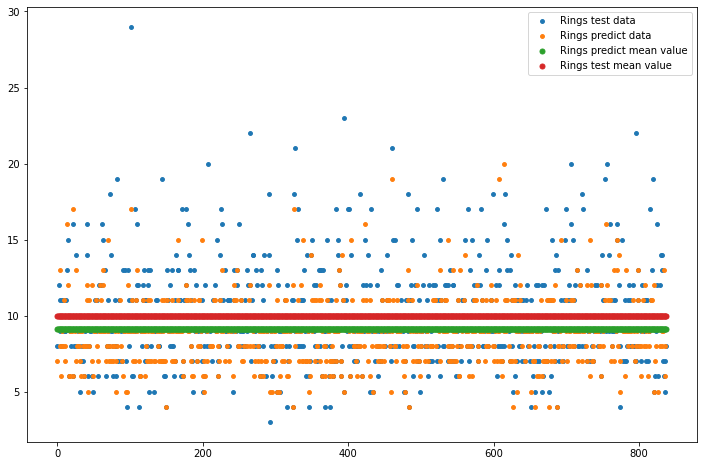

In [17]:
# SCATTERPLOT of the Rings' test data and predicted data
fig, ax = plt.subplots(figsize=(12, 8))
x = np.linspace(0,len(y_pred_k5cv15),len(y_pred_k5cv15))

print(f'Mean of y_test: {np.mean(y_test_k5cv15)}') # means of test and predict
print(f'Mean of y_pred: {np.mean(y_pred_k5cv15)}') # means of test and predict
# plot the 3 sets
ax.scatter(x,y_test_k5cv15,label='Rings test data', s=15)
ax.scatter(x,y_pred_k5cv15, label='Rings predict data', s=15)
ax.scatter(x,np.mean(y_pred_k5cv15)*np.ones([len(y_pred_k5cv15)]), label='Rings predict mean value',s=25)
ax.scatter(x,np.mean(y_test_k5cv15)*np.ones([len(y_test_k5cv15)]), label='Rings test mean value', s=25)
# ax.scatter(x,np.mean(y_pred), label='Rings predict mean data')
# call with no parameters
plt.legend()
plt.show()

#### Comment on the Scatter Plot (as above) ####

The red line shows the mean of the actual y_test data at 9.876
The green line shows the mean of the y_pred values at 9.134

From the plot, we can observe that the actual test data (blue) is slightly more dispersed northwards on 
comparison to the predicted data points (orange). 

Thus, we conclude that the mean of the actual data is correspondingly slightly higher than the 
mean of the predicted values


---
### Bar plot of Frequency Count against the Rings number (age) ###

Mean of the Rings label: 9.933684462532918
Median of the Rings label: 9.0


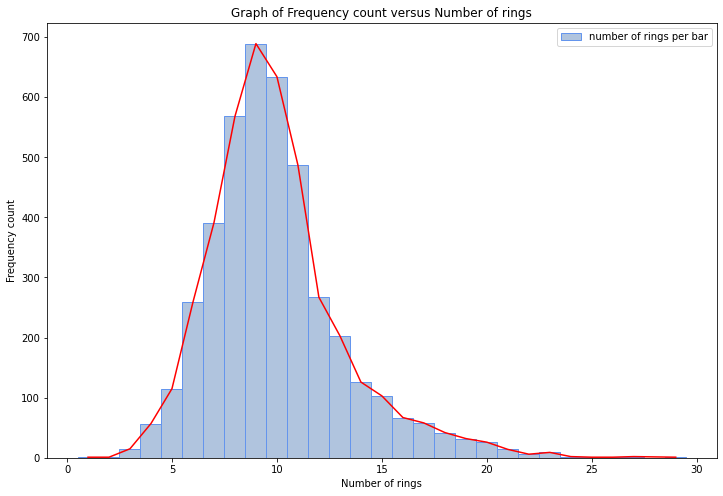

9.933684462532918


In [18]:
# BAR CHART of the number of rings vs frequency count
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

x_norm_df = pd.DataFrame(X_norm, columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings'])
rings_dict =Counter(x_norm_df['Rings'])
print('Mean of the Rings label:', x_norm_df['Rings'].mean())
print('Median of the Rings label:', x_norm_df['Rings'].median())
rings_sorted_rings = sorted(rings_dict.items(), key=lambda x: x[0], reverse=False)
x_vals = [i[0] for i in rings_sorted_rings]
y_vals = [i[1] for i in rings_sorted_rings]
graph = pd.DataFrame({'x': x_vals, 'y': y_vals})

plt.figure(figsize=(12,8))
plt.bar(np.array(x_vals), y_vals, width=1, label = 'number of rings per bar', color = 'lightsteelblue', edgecolor = 'cornflowerblue')
plt.plot(np.array(x_vals), y_vals, color = 'red')
plt.xlabel('Number of rings')
plt.ylabel('Frequency count')
plt.title('Graph of Frequency count versus Number of rings')
plt.legend()
plt.show()
print(x_norm_df['Rings'].mean())

#### Graph of Frequency count versus Number of rings (as above) ####

In this graph, we seek to understand the relationship of the frequency count in respect with
the number of rings. The histogram and the line indicate that the mean of the Rings label is 9.93 while the
median value of the Rings label is 9. 


---
### Plot of Confusion Matrix Display ###

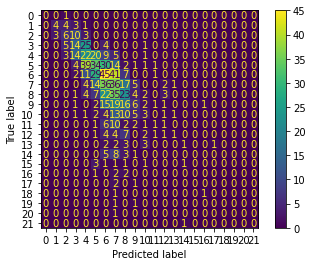

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#Display the confusion matrix
disp = disp.plot()
plt.show()

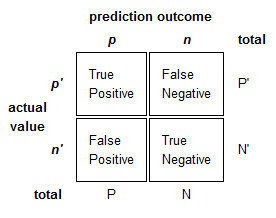

#### Confusion Matrix Display ####

As above, we have generated a confusion matrix plot base. We can observe that the 'lighted' greenish blue area is generally located in the top left hand corner. The 'lighted' greenish blue area represents where our data lies.

When we compare with the standard confusion matrix table shown above, it points out that the 'lighted' greenish blue area corresponds to the True Positive (TP) box. It tells us that our KNN algo is classifying our label predicted values well. 

---
## Heatmap of Pairwise Correlation among the features and label ##

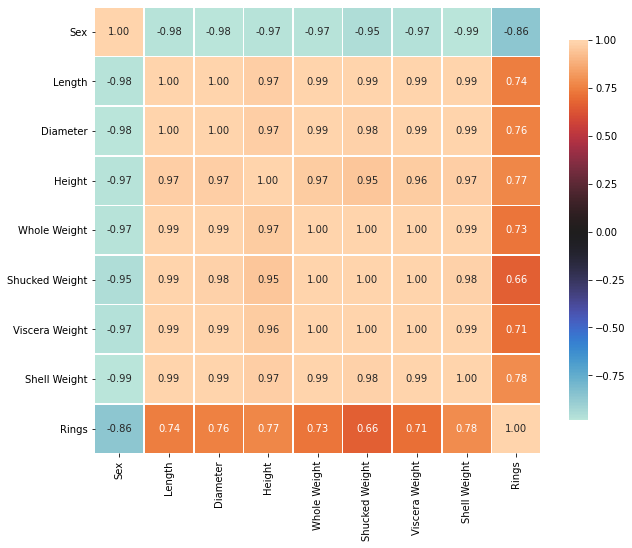

In [29]:
import seaborn as sns

# Heatmap plot of the correlationship among the label and its features
correlation = x_norm_df.corr()
correlationship = correlation.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlationship, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

#### Heatmap of Pairwise Correlation among the features and label ####

The correlation heatmap shown above is useful enough to give us a meaningful insight on the correlation relationship between the label and the features and among the features themselves.

From the heatmap above, we can observe that Rings label has the highest correlation factor of 0.63 with the Shell Weight features. The next 3 highest correlation features with the Rings label are length, diameter and height, with a correlation factor of 0.56, 0.57, 0.56 respectively.

Let's look at the features correlation with one another. Among the features, we can observe that Whole Weight, Shucked Weight, Viscera Weight and Shell Weight have a very high correlation factor of 0.90 and above among themselves. In order to improve the model accuracy, we can employ feature selection to eliminate highly correlated features to further improve the model.

From the heatmap, we can observe that Whole Weight, Shucked Weight and Viscera Weight have a perfect positive correlation of 1.0 with one another. Shell Weight comes closely behind and with them in terms of correlation. Among the four type of weight features mentioned, Shell Weight has the highest correlation factor of 0.78 with the label Rings. Thus, to improve the accuracy performance of the model, we could eliminate Whole Weight, Shucked Weight, Viscera Weight, leaving Shell Weight as the 'winner' representation as the only Weight feature.

---
## Final Thoughts ## 

At a prediction rate of 20 to 25%, I think we can do much more to improve the KNN algorithm and performing feature selection to improve the performance. 

#### DATA CLEANING & FEATURE SELECTION ####

Machine Learning models are as good or as bad as the data you have. Thus, pre-processing and cleansing the data is a very crucial part of the process. Select only the features that would contribute most to the quality of the resulting model is equally important. This process is called Feature Selection. It is the process of selecting the attributes that can make the predicted variable more accurate or eliminating those features that are irrelevant and can decrease the model accuracy and quality.

If the dataset (e.g. the abalone case studies) has perfectly positive or negative features then there is a high chance that the performance of the model will be impacted by a problem called — Multicollinearity. Multicollinearity happens when one predictor variable in a model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.

There are multiple ways to deal with this problem. The easiest way is to delete or eliminate one of the perfectly correlated features (which we could have in the abalone dataset's features as mentioned just above). Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).

#### KNN ALGORITHM IMPROVEMENT ####

During the process of coding up the KNN function in the earlier part, it comes to my attention that in the case of an even K number (K as in the number of neighbors in this context), there could be a chance that there will be, for example, 5 Rings of integer value 8 and 5 Rings of integer value 9 in the K=10 neighborhood. This situation can also happen for other K even number of neighbors. 

The algorithm we have done will fail to recognize that as no Ring will emerge with a majority. Thus, it might be classifed as False (failed prediction). We can go one step further to refine the algorithm. We could have tried to measure the euclidean distance of the other class (on one side) and the euclidean distance of the other class (on the other side). Whichever class has the shorter euclidean distance to the sample data point will classify the sample data point as its own class type. 

---